In [14]:
train_dir = '/Users/AMAB/Desktop/Bashar/MEC/Artificial Intelligence & Deep Learning/Dataset/train'
test_dir = '/Users/AMAB/Desktop/Bashar/MEC/Artificial Intelligence & Deep Learning/Dataset/test'

In [15]:
import os
print(len(os.listdir('/Users/AMAB/Desktop/Bashar/MEC/Artificial Intelligence & Deep Learning/Dataset/train/Bears')))
print(len(os.listdir('/Users/AMAB/Desktop/Bashar/MEC/Artificial Intelligence & Deep Learning/Dataset/train/Pandas')))
print(len(os.listdir('/Users/AMAB/Desktop/Bashar/MEC/Artificial Intelligence & Deep Learning/Dataset/test/Bears')))
print(len(os.listdir('/Users/AMAB/Desktop/Bashar/MEC/Artificial Intelligence & Deep Learning/Dataset/test/Pandas')))

250
250
50
50


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [17]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [18]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
13/13 [==============================] - 11s 706ms/step - loss: 0.7380 - accuracy: 0.7725 - val_loss: 0.0836 - val_accuracy: 1.0000
Epoch 2/30
13/13 [==============================] - 10s 741ms/step - loss: 0.1629 - accuracy: 0.9625 - val_loss: 0.0129 - val_accuracy: 0.9900
Epoch 3/30
13/13 [==============================] - 9s 721ms/step - loss: 0.0085 - accuracy: 0.9950 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/30
13/13 [==============================] - 11s 829ms/step - loss: 0.0131 - accuracy: 0.9975 - val_loss: 3.3631e-04 - val_accuracy: 1.0000
Epoch 5/30
13/13 [==============================] - 10s 758ms/step - loss: 0.0035 - accuracy: 0.9975 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/30
13/13 [==============================] - 10s 775ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.3660e-04 - val_accuracy: 1.0000
Epoch 7/30
13/13 [==============================] - 10s 760ms/step - loss: 2.9106e-04 - accuracy: 1.0000 - val_loss: 9.1443e-04 - val_a

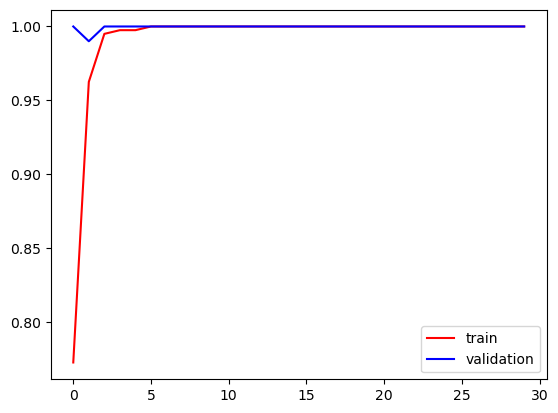

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

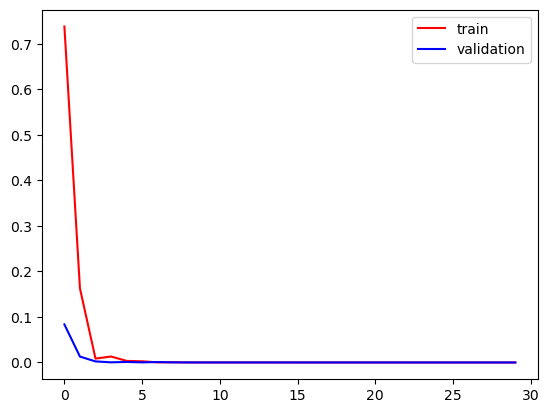

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [24]:
predictions = model.predict(test_data)
print(predictions)

4/4 [==============================] - 1s 92ms/step
[[8.13036024e-07]
 [9.99999821e-01]
 [5.45692365e-06]
 [4.30725215e-08]
 [9.99999821e-01]
 [9.99998271e-01]
 [1.13296814e-07]
 [2.12273335e-07]
 [9.99997854e-01]
 [1.67162952e-07]
 [1.60268428e-07]
 [5.82372049e-05]
 [5.62228237e-08]
 [1.51853172e-07]
 [5.99097575e-07]
 [9.99998808e-01]
 [5.16159950e-08]
 [1.98985305e-07]
 [9.99999821e-01]
 [2.82018732e-07]
 [9.99998629e-01]
 [9.99975443e-01]
 [9.99999940e-01]
 [9.99999821e-01]
 [9.99999881e-01]
 [9.99996901e-01]
 [9.99990463e-01]
 [1.00000000e+00]
 [1.57427404e-08]
 [9.99999881e-01]
 [9.99999762e-01]
 [9.99991953e-01]
 [9.95244989e-08]
 [3.71771840e-08]
 [9.99999821e-01]
 [9.99999881e-01]
 [1.32913511e-08]
 [2.51283268e-07]
 [1.00000000e+00]
 [1.00000000e+00]
 [5.67446579e-09]
 [9.99999821e-01]
 [9.99996841e-01]
 [9.99999523e-01]
 [7.46797184e-07]
 [1.98676219e-07]
 [8.92167691e-08]
 [9.99548912e-01]
 [9.99999940e-01]
 [6.12071915e-07]
 [9.99979675e-01]
 [2.96961424e-08]
 [1.00000000

In [25]:
len(predictions)

100

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[24 26]
 [26 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.48      0.48        50
           1       0.48      0.48      0.48        50

    accuracy                           0.48       100
   macro avg       0.48      0.48      0.48       100
weighted avg       0.48      0.48      0.48       100

